In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


In [2]:
# Store filepaths into variable
games_teams = Path("Data/games_teams_merged.csv")

In [3]:
# Read in files and make dfs
games_teams_df = pd.read_csv(games_teams)

In [4]:
# View files
games_teams_df

,game_date_est,game_id,game_status_text,home_team_id,visitor_team_id,season,team_id_home,pts_home,fg_pct_home,ft_pct_home,...,team_id,abbreviation,nickname,city,arena,arenacapacity,owner,generalmanager,headcoach,dleagueaffiliation
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126,0.484,0.926,...,1610612740,NOP,Pelicans,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120,0.488,0.952,...,1610612762,UTA,Jazz,Utah,Vivint Smart Home Arena,20148.0,Greg Miller,Dennis Lindsey,Quin Snyder,Salt Lake City Stars
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114,0.482,0.786,...,1610612739,CLE,Cavaliers,Cleveland,Quicken Loans Arena,20562.0,Dan Gilbert,Koby Altman,John Beilein,Canton Charge
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113,0.441,0.909,...,1610612755,PHI,76ers,Philadelphia,Wells Fargo Center,NaN,Joshua Harris,Elton Brand,Brett Brown,Delaware Blue Coats
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108,0.429,1.000,...,1610612737,ATL,Hawks,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26518,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93,0.419,0.821,...,1610612737,ATL,Hawks,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
26519,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81,0.338,0.719,...,1610612741,CHI,Bulls,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
26520,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98,0.448,0.682,...,1610612747,LAL,Lakers,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
26521,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99,0.440,0.771,...,1610612761,TOR,Raptors,Toronto,Scotiabank Arena,19800.0,Maple Leaf Sports and Entertainment,Masai Ujiri,Nick Nurse,Raptors 905


In [5]:
# Esnure data is complete
games_teams_df.count()

game_date_est         26523
game_id               26523
game_status_text      26523
home_team_id          26523
visitor_team_id       26523
season                26523
team_id_home          26523
pts_home              26523
fg_pct_home           26523
ft_pct_home           26523
fg3_pct_home          26523
ast_home              26523
reb_home              26523
team_id_away          26523
pts_away              26523
fg_pct_away           26523
ft_pct_away           26523
fg3_pct_away          26523
ast_away              26523
reb_away              26523
home_team_wins        26523
team_id               26523
abbreviation          26523
nickname              26523
city                  26523
arena                 26523
arenacapacity         23043
owner                 26523
generalmanager        26523
headcoach             26523
dleagueaffiliation    26523
dtype: int64

In [6]:
# Remove arenacapacity column
games_teams_clean_df = games_teams_df.drop(columns = "arenacapacity")
games_teams_clean_df

,game_date_est,game_id,game_status_text,home_team_id,visitor_team_id,season,team_id_home,pts_home,fg_pct_home,ft_pct_home,...,home_team_wins,team_id,abbreviation,nickname,city,arena,owner,generalmanager,headcoach,dleagueaffiliation
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126,0.484,0.926,...,1,1610612740,NOP,Pelicans,New Orleans,Smoothie King Center,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120,0.488,0.952,...,1,1610612762,UTA,Jazz,Utah,Vivint Smart Home Arena,Greg Miller,Dennis Lindsey,Quin Snyder,Salt Lake City Stars
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114,0.482,0.786,...,1,1610612739,CLE,Cavaliers,Cleveland,Quicken Loans Arena,Dan Gilbert,Koby Altman,John Beilein,Canton Charge
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113,0.441,0.909,...,1,1610612755,PHI,76ers,Philadelphia,Wells Fargo Center,Joshua Harris,Elton Brand,Brett Brown,Delaware Blue Coats
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108,0.429,1.000,...,0,1610612737,ATL,Hawks,Atlanta,State Farm Arena,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26518,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93,0.419,0.821,...,1,1610612737,ATL,Hawks,Atlanta,State Farm Arena,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
26519,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81,0.338,0.719,...,0,1610612741,CHI,Bulls,Chicago,United Center,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
26520,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98,0.448,0.682,...,1,1610612747,LAL,Lakers,Los Angeles,Staples Center,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
26521,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99,0.440,0.771,...,1,1610612761,TOR,Raptors,Toronto,Scotiabank Arena,Maple Leaf Sports and Entertainment,Masai Ujiri,Nick Nurse,Raptors 905


In [7]:
# Get rid of insignificant columns
games_teams_condensed_df = games_teams_df.drop(columns = ["game_status_text", "owner", 
                                                          "generalmanager", "dleagueaffiliation"])
games_teams_condensed_df

,game_date_est,game_id,home_team_id,visitor_team_id,season,team_id_home,pts_home,fg_pct_home,ft_pct_home,fg3_pct_home,...,ast_away,reb_away,home_team_wins,team_id,abbreviation,nickname,city,arena,arenacapacity,headcoach
0,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126,0.484,0.926,0.382,...,23,44,1,1610612740,NOP,Pelicans,New Orleans,Smoothie King Center,NaN,Alvin Gentry
1,2022-12-22,22200478,1610612762,1610612764,2022,1610612762,120,0.488,0.952,0.457,...,20,37,1,1610612762,UTA,Jazz,Utah,Vivint Smart Home Arena,20148.0,Quin Snyder
2,2022-12-21,22200466,1610612739,1610612749,2022,1610612739,114,0.482,0.786,0.313,...,20,46,1,1610612739,CLE,Cavaliers,Cleveland,Quicken Loans Arena,20562.0,John Beilein
3,2022-12-21,22200467,1610612755,1610612765,2022,1610612755,113,0.441,0.909,0.297,...,15,46,1,1610612755,PHI,76ers,Philadelphia,Wells Fargo Center,NaN,Brett Brown
4,2022-12-21,22200468,1610612737,1610612741,2022,1610612737,108,0.429,1.000,0.378,...,20,47,0,1610612737,ATL,Hawks,Atlanta,State Farm Arena,18729.0,Lloyd Pierce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26518,2014-10-06,11400007,1610612737,1610612740,2014,1610612737,93,0.419,0.821,0.421,...,17,43,1,1610612737,ATL,Hawks,Atlanta,State Farm Arena,18729.0,Lloyd Pierce
26519,2014-10-06,11400004,1610612741,1610612764,2014,1610612741,81,0.338,0.719,0.381,...,17,47,0,1610612741,CHI,Bulls,Chicago,United Center,21711.0,Jim Boylen
26520,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98,0.448,0.682,0.500,...,19,43,1,1610612747,LAL,Lakers,Los Angeles,Staples Center,19060.0,Frank Vogel
26521,2014-10-05,11400002,1610612761,1610612758,2014,1610612761,99,0.440,0.771,0.333,...,18,45,1,1610612761,TOR,Raptors,Toronto,Scotiabank Arena,19800.0,Nick Nurse


In [8]:
# Define path for game_details file 
games_details = Path("Data/games_details_updated.csv")

# Read in file and convert to DataFrame
games_details_df = pd.read_csv(games_details, low_memory = False)

# View DataFrame
games_details_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [9]:
# Isolate statisitics to be added to main dataframe and group by game and team
games_details_sum = games_details_df.groupby(["GAME_ID", "TEAM_ID"]).sum(["STL", "BLK", "TO", "PF"])

# Remove extraneous columns
games_details_sum = games_details_sum[["STL", "BLK", "TO", "PF"]]

# Reset index
games_details_sum = games_details_sum.reset_index()

# Rename GAME_ID column to match games_teams_condensed_df
games_details_sum = games_details_sum.rename(columns = {"GAME_ID": "game_id"})

# View DataFrame
games_details_sum

,game_id,TEAM_ID,STL,BLK,TO,PF
0,10300001,1610612742,9.0,4.0,18.0,34.0
1,10300001,1610612762,8.0,4.0,18.0,26.0
2,10300002,1610612749,9.0,4.0,24.0,26.0
3,10300002,1610612763,18.0,7.0,25.0,35.0
4,10300003,1610612739,10.0,7.0,25.0,33.0
...,...,...,...,...,...,...
53042,52100131,1610612759,4.0,3.0,6.0,20.0
53043,52100201,1610612737,5.0,3.0,13.0,19.0
53044,52100201,1610612739,8.0,4.0,11.0,20.0
53045,52100211,1610612740,2.0,3.0,8.0,26.0


In [10]:
# Separate home and away data 
home_stats = games_details_sum.rename(columns=lambda x: f"{x.lower()}_home" if x != 'game_id' and x != 'TEAM_ID' else x)
away_stats = games_details_sum.rename(columns=lambda x: f"{x.lower()}_away" if x != 'game_id' and x != 'TEAM_ID' else x)

# Merge home stats
merged_df = pd.merge(games_teams_condensed_df, home_stats, left_on=['game_id', 'home_team_id'], right_on=['game_id', 'TEAM_ID'], how='left')
merged_df = merged_df.drop(columns=['TEAM_ID'])

# Merge away stats
merged_df = pd.merge(merged_df, away_stats, left_on=['game_id', 'visitor_team_id'], right_on=['game_id', 'TEAM_ID'], how='left')
merged_df = merged_df.drop(columns=['TEAM_ID'])

# Define desired column order
desired_columns = [
    'game_date_est', 'game_id', 'home_team_id', 'visitor_team_id', 'season', 
    'team_id_home', 'team_id_away', 'pts_home', 'fg_pct_home', 'ft_pct_home', 'fg3_pct_home',
    'ast_home', 'reb_home', 'stl_home', 'blk_home', 'to_home', 'pf_home',
    'pts_away', 'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away', 'reb_away',
    'stl_away', 'blk_away', 'to_away', 'pf_away', 'team_id',
    'abbreviation', 'nickname', 'city', 'arena', 'headcoach','home_team_wins'
]

# Reindex dataframe to the desired column order
merged_df = merged_df.reindex(columns=desired_columns)

# Resulting dataframe
merged_df

,game_date_est,game_id,home_team_id,visitor_team_id,season,team_id_home,team_id_away,pts_home,fg_pct_home,ft_pct_home,...,blk_away,to_away,pf_away,team_id,abbreviation,nickname,city,arena,headcoach,home_team_wins
0,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,1610612759,126,0.484,0.926,...,2.0,17.0,24.0,1610612740,NOP,Pelicans,New Orleans,Smoothie King Center,Alvin Gentry,1
1,2022-12-22,22200478,1610612762,1610612764,2022,1610612762,1610612764,120,0.488,0.952,...,2.0,10.0,15.0,1610612762,UTA,Jazz,Utah,Vivint Smart Home Arena,Quin Snyder,1
2,2022-12-21,22200466,1610612739,1610612749,2022,1610612739,1610612749,114,0.482,0.786,...,5.0,19.0,23.0,1610612739,CLE,Cavaliers,Cleveland,Quicken Loans Arena,John Beilein,1
3,2022-12-21,22200467,1610612755,1610612765,2022,1610612755,1610612765,113,0.441,0.909,...,1.0,22.0,15.0,1610612755,PHI,76ers,Philadelphia,Wells Fargo Center,Brett Brown,1
4,2022-12-21,22200468,1610612737,1610612741,2022,1610612737,1610612741,108,0.429,1.000,...,4.0,11.0,15.0,1610612737,ATL,Hawks,Atlanta,State Farm Arena,Lloyd Pierce,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26518,2014-10-06,11400007,1610612737,1610612740,2014,1610612737,1610612740,93,0.419,0.821,...,3.0,15.0,27.0,1610612737,ATL,Hawks,Atlanta,State Farm Arena,Lloyd Pierce,1
26519,2014-10-06,11400004,1610612741,1610612764,2014,1610612741,1610612764,81,0.338,0.719,...,3.0,19.0,33.0,1610612741,CHI,Bulls,Chicago,United Center,Jim Boylen,0
26520,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,1610612743,98,0.448,0.682,...,7.0,16.0,27.0,1610612747,LAL,Lakers,Los Angeles,Staples Center,Frank Vogel,1
26521,2014-10-05,11400002,1610612761,1610612758,2014,1610612761,1610612758,99,0.440,0.771,...,4.0,27.0,27.0,1610612761,TOR,Raptors,Toronto,Scotiabank Arena,Nick Nurse,1


In [11]:
# Export merged_df
merged_df.to_csv('Data/Final_merged_dataset.csv')

### Define the features and target variable

In [12]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = merged_df['home_team_wins']

# Separate the X variable, the features
X = merged_df.drop(columns='home_team_wins')

In [13]:
# Define the features and target variable
features = ['fg_pct_home', 'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home',
            'stl_home', 'blk_home', 'to_home', 'pf_home',
            'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away', 'reb_away',
            'stl_away', 'blk_away', 'to_away', 'pf_away']
X = merged_df[features]
y = merged_df['home_team_wins']

In [14]:
print(y)

0        1
1        1
2        1
3        1
4        0
        ..
26518    1
26519    0
26520    1
26521    1
26522    0
Name: home_team_wins, Length: 26523, dtype: int64


In [15]:
X.head()

,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,stl_home,blk_home,to_home,pf_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,stl_away,blk_away,to_away,pf_away
0,0.484,0.926,0.382,25,46,10.0,6.0,17.0,24.0,0.478,0.815,0.321,23,44,8.0,2.0,17.0,24.0
1,0.488,0.952,0.457,16,40,5.0,3.0,11.0,16.0,0.561,0.765,0.333,20,37,5.0,2.0,10.0,15.0
2,0.482,0.786,0.313,22,37,8.0,3.0,10.0,21.0,0.470,0.682,0.433,20,46,7.0,5.0,19.0,23.0
3,0.441,0.909,0.297,27,49,8.0,7.0,12.0,23.0,0.392,0.735,0.261,15,46,6.0,1.0,22.0,15.0
4,0.429,1.000,0.378,22,47,6.0,7.0,15.0,15.0,0.500,0.773,0.292,20,47,9.0,4.0,11.0,15.0


### Split the data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

### Make Predictions and Evaluate the Model

In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\n")
print(f"Accuracy: {accuracy:.3%}")
print("\n")
print("Classification Report:")
print(report)

Confusion Matrix:
[[1861  343]
 [ 234 2867]]


Accuracy: 89.123%


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      2204
           1       0.89      0.92      0.91      3101

    accuracy                           0.89      5305
   macro avg       0.89      0.88      0.89      5305
weighted avg       0.89      0.89      0.89      5305



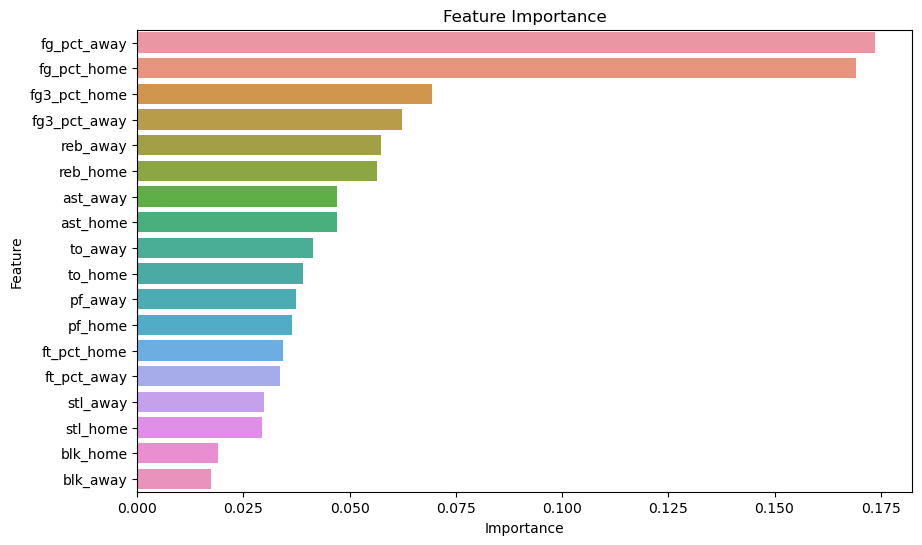

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()
